### Загрузка данных

In [ ]:
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
prime = pd.read_csv('kaggle_train_churn.csv')


In [ ]:
prime.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Score,CLTV,Churn Reason,Churn Value
0,2995-YWTCD,1,United States,California,Browns Valley,95918,"39.292334, -121.320597",39.292334,-121.320597,Female,No,Yes,Yes,19,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.90,79,5396,NaN,0
1,3318-ISQFQ,1,United States,California,Newark,94560,"37.504133, -122.032347",37.504133,-122.032347,Female,No,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.50,28,5409,NaN,0
2,2469-DTSGX,1,United States,California,Somis,93066,"34.297628, -119.014627",34.297628,-119.014627,Female,Yes,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,111.65,75,5388,NaN,0
3,8896-BQTTI,1,United States,California,Cool,95614,"38.880622, -120.973865",38.880622,-120.973865,Male,No,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,53,2371,NaN,0
4,9565-DJPIB,1,United States,California,Vallejo,94590,"38.104705, -122.247387",38.104705,-122.247387,Female,No,No,No,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Mailed check,89.60,87,4689,Network reliability,1


In [ ]:
test = pd.read_csv('kaggle_test_churn.csv')
test.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges
0,3638-DIMPH,1,United States,California,Wilseyville,95257,"38.392686, -120.415951",38.392686,-120.415951,Female,No,Yes,No,13,Yes,No,DSL,No,No,No,No,No,No,One year,No,Electronic check,43.80
1,5175-WLYXL,1,United States,California,Lone Pine,93545,"36.590415, -118.073839",36.590415,-118.073839,Male,No,No,No,22,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,78.85
2,7054-DMVAS,1,United States,California,Redwood Valley,95470,"39.298065, -123.25211",39.298065,-123.252110,Male,No,No,No,54,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Bank transfer (automatic),65.30
3,1767-TGTKO,1,United States,California,Dana Point,92629,"33.477923, -117.705314",33.477923,-117.705314,Female,No,Yes,Yes,8,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.45
4,3170-NMYVV,1,United States,California,Compton,90222,"33.912246, -118.236773",33.912246,-118.236773,Female,No,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.15


In [ ]:
diff = prime.columns[~prime.columns.isin(test.columns)]

In [ ]:
prime[diff]

,Churn Score,CLTV,Churn Reason,Churn Value
0,79,5396,NaN,0
1,28,5409,NaN,0
2,75,5388,NaN,0
3,53,2371,NaN,0
4,87,4689,Network reliability,1
...,...,...,...,...
5277,76,3265,NaN,0
5278,45,3733,NaN,0
5279,60,4821,NaN,0
5280,30,2334,NaN,0


In [ ]:
diff

Index(['Churn Score', 'CLTV', 'Churn Reason', 'Churn Value'], dtype='object')

### Обработка и анализ данных

In [ ]:
np.sum(prime.isna())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Churn Score             0
CLTV                    0
Churn Reason         3912
Churn Value             0
dtype: int64

Видимо, что пропусков у наших признаков нет

In [ ]:
prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5282 non-null   object 
 1   Count              5282 non-null   int64  
 2   Country            5282 non-null   object 
 3   State              5282 non-null   object 
 4   City               5282 non-null   object 
 5   Zip Code           5282 non-null   int64  
 6   Lat Long           5282 non-null   object 
 7   Latitude           5282 non-null   float64
 8   Longitude          5282 non-null   float64
 9   Gender             5282 non-null   object 
 10  Senior Citizen     5282 non-null   object 
 11  Partner            5282 non-null   object 
 12  Dependents         5282 non-null   object 
 13  Tenure Months      5282 non-null   int64  
 14  Phone Service      5282 non-null   object 
 15  Multiple Lines     5282 non-null   object 
 16  Internet Service   5282 

In [ ]:
prime['Zip Code'].nunique(), prime['Lat Long'].nunique()

(1646, 1646)

In [ ]:
prime.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Churn Score', 'CLTV', 'Churn Reason',
       'Churn Value'],
      dtype='object')

In [ ]:
#разделяем нужные признаки
num_cols = [
             'Latitude',
            'Longitude',
            'Tenure Months',
            'Monthly Charges'
            ]

cat_cols = [
            'Zip Code',
           'Country',
            'State',
            'City',
            'Gender',
            'Senior Citizen',
            'Partner',
            'Dependents',
           'Phone Service',
            'Multiple Lines',
            'Internet Service',
            'Online Security',
            'Online Backup',
            'Device Protection',
         'Tech Support',
          'Streaming TV',
       'Streaming Movies',
        'Contract',
         'Paperless Billing',
          'Payment Method',
            ]

In [ ]:
a = num_cols.copy()
b = cat_cols.copy()
a.extend(['Churn Score','CLTV'])
b.extend(['Churn Reason',
       'Churn Value'])

Посмотрим на распределения

  0%|          | 0/6 [00:00<?, ?it/s]

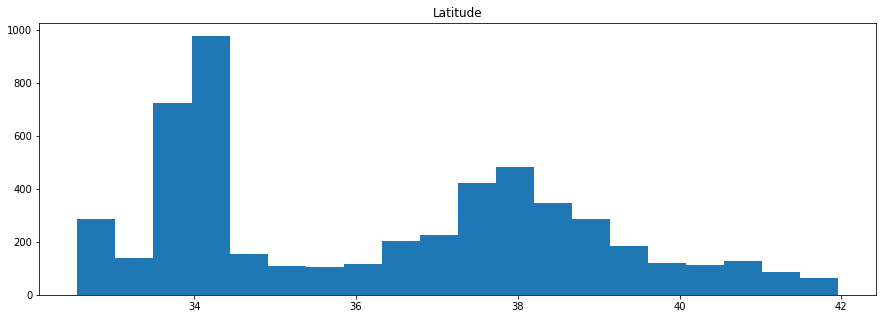

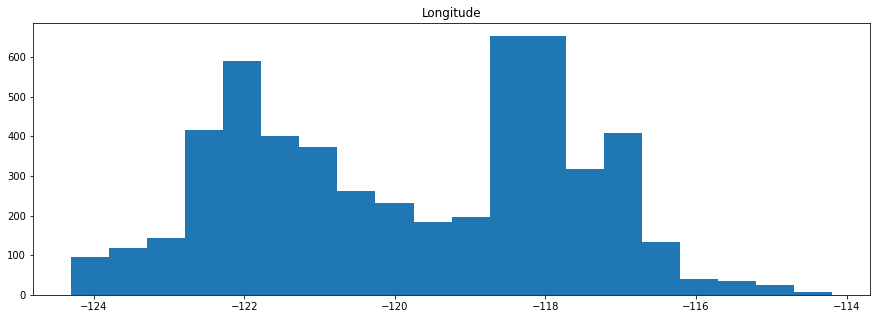

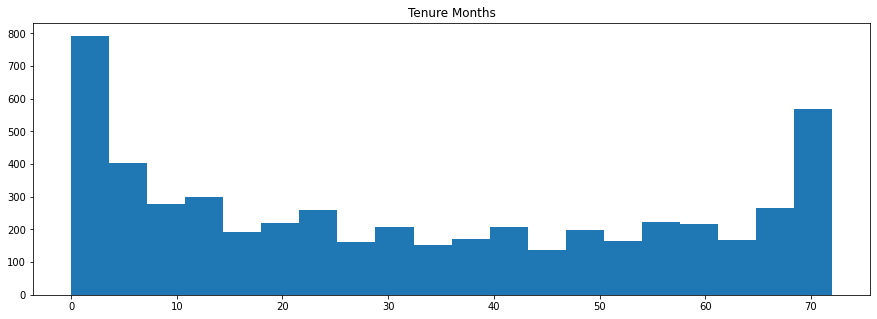

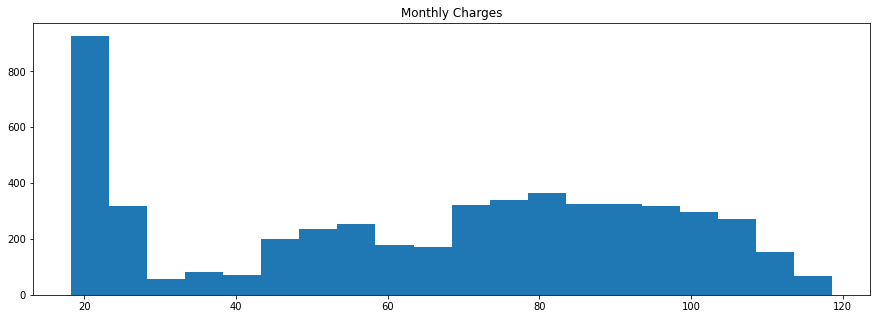

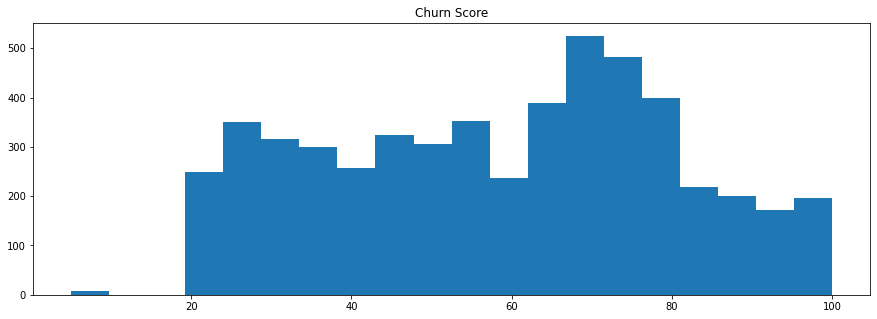

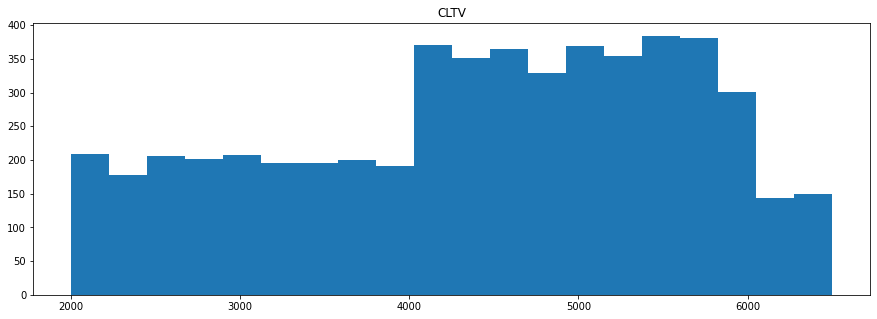

In [ ]:
for i in tqdm(range(len(a))):
    plt.figure(figsize=(15,5))
    plt.title(a[i])
    plt.hist(prime[a[i] ], bins=20)
    plt.show()

  0%|          | 0/22 [00:00<?, ?it/s]

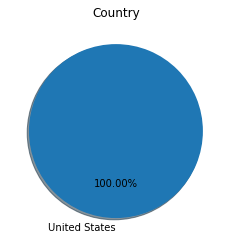

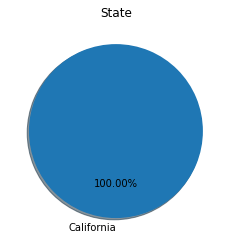

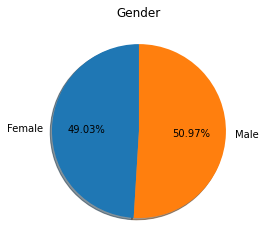

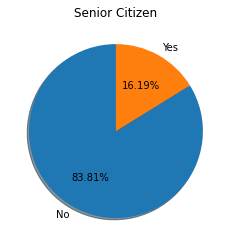

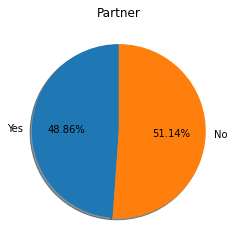

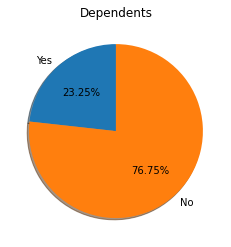

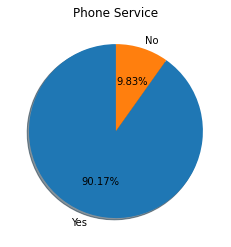

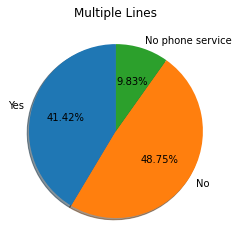

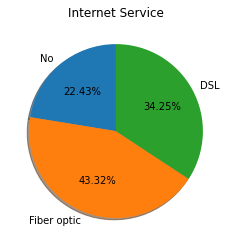

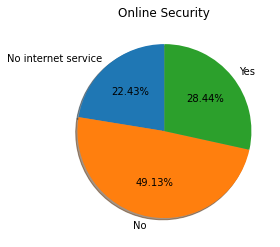

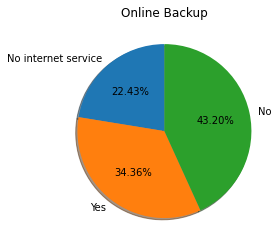

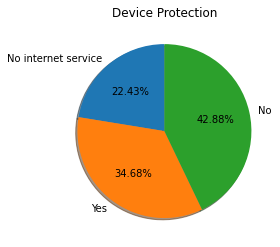

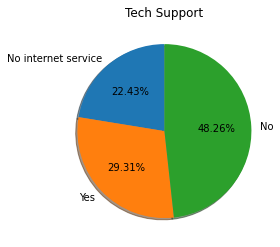

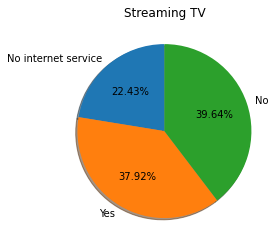

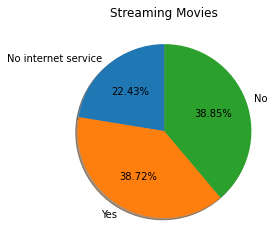

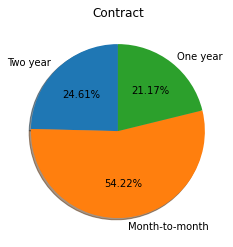

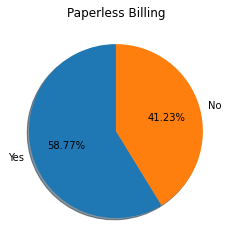

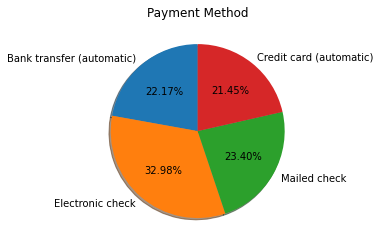

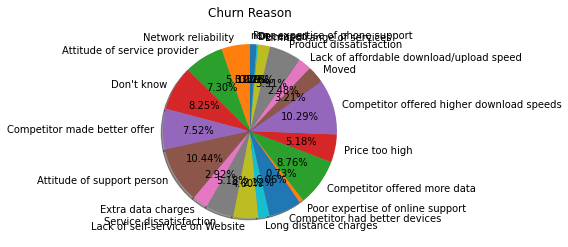

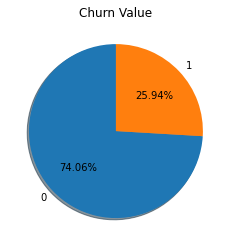

In [ ]:
 for i in tqdm(range(len(b))):
    if b[i] in ['Zip Code','City']:
        continue
    labels = prime[b[i]].unique()
    sizes = [np.sum(prime[b[i]] == labels[j]) for j in range(len(labels))]

    plt.title(b[i])
    plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    plt.show()

Классы не являются сбалансированными

Посмотрим на распределение клиентов по географии

<function matplotlib.pyplot.show>

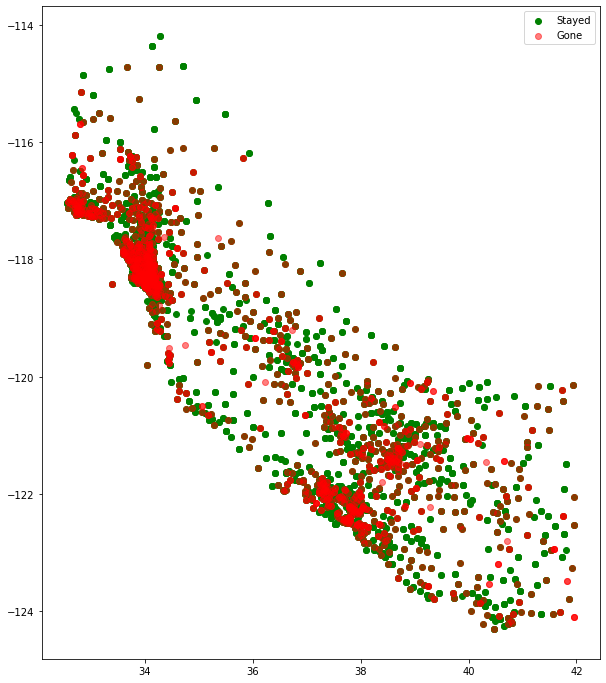

In [ ]:
plt.figure(figsize=(10,12))
plt.scatter(prime[prime['Churn Value'] == 0]['Latitude'], prime[prime['Churn Value'] == 0]['Longitude'], c='g', label = 'Stayed', alpha = 1)
plt.scatter(prime[prime['Churn Value'] == 1]['Latitude'], prime[prime['Churn Value'] == 1]['Longitude'], c='r', label = 'Gone', alpha = 0.5)
plt.legend()
plt.show

In [ ]:
print(prime['City'].value_counts(), '\n', prime[['City']].nunique())

Los Angeles      235
San Diego        117
San Jose          86
San Francisco     85
Sacramento        84
                ... 
Wrightwood         1
Gridley            1
Dixon              1
Garden Valley      1
Lewiston           1
Name: City, Length: 1125, dtype: int64 
 City    1125
dtype: int64


In [ ]:
prime[['Churn Reason']].value_counts()

Churn Reason                             
Attitude of support person                   143
Competitor offered higher download speeds    141
Competitor offered more data                 120
Don't know                                   113
Competitor made better offer                 103
Attitude of service provider                 100
Competitor had better devices                 83
Product dissatisfaction                       81
Network reliability                           73
Service dissatisfaction                       71
Price too high                                71
Lack of self-service on Website               63
Moved                                         44
Extra data charges                            40
Lack of affordable download/upload speed      34
Limited range of services                     31
Long distance charges                         29
Poor expertise of phone support               16
Poor expertise of online support              10
Deceased                   

Добавим признак "количество используемых услуг"

In [ ]:
prime.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Churn Score', 'CLTV', 'Churn Reason',
       'Churn Value'],
      dtype='object')

In [ ]:
prime['Number of Services'] = np.int8(prime['Phone Service'] == 'Yes') + np.int8(prime['Multiple Lines'] == 'Yes') + np.int8(prime['Internet Service'] != 'No') \
+ np.int8(prime['Online Security'] == 'Yes') + np.int8(prime['Online Backup'] == 'Yes') + np.int8(prime['Device Protection'] == 'Yes') + np.int8(prime['Tech Support'] == 'Yes')

In [ ]:
prime[['Number of Services']].head()

,Number of Services
0,2
1,1
2,6
3,2
4,4


In [ ]:
prime[['Number of Services']].value_counts()

Number of Services
1                     1020
4                      990
3                      921
2                      884
5                      799
6                      437
7                      231
dtype: int64

In [ ]:
num_cols.append('Number of Services')

In [ ]:
test['Number of Services'] = np.int8(test['Phone Service'] == 'Yes') + np.int8(test['Multiple Lines'] == 'Yes') + np.int8(test['Internet Service'] != 'No') \
+ np.int8(test['Online Security'] == 'Yes') + np.int8(test['Online Backup'] == 'Yes') + np.int8(test['Device Protection'] == 'Yes') + np.int8(test['Tech Support'] == 'Yes')

Попробуем составить характеристики клиентов, склонных к оттоку

In [ ]:
params = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Internet Service', 'Contract', 'Number of Services']
vals = ['Tenure Months', 'Monthly Charges,'	'Churn Score', 'CLTV']

In [ ]:
prime.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value,Number of Services
count,5282.0,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,1.0,93519.303484,36.289014,-119.808827,32.565884,64.281929,58.322794,4415.362173,0.259371,3.359523
std,0.0,1867.230602,2.459121,2.156348,24.606356,30.258852,21.601969,1184.458870,0.438331,1.745840
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,5.000000,2003.000000,0.000000,1.000000
25%,1.0,92086.000000,34.029175,-121.823565,9.000000,34.200000,40.000000,3483.250000,0.000000,2.000000
50%,1.0,93554.500000,36.414413,-119.739935,29.000000,70.150000,60.000000,4545.500000,0.000000,3.000000
75%,1.0,95356.000000,38.226681,-118.043237,56.000000,89.850000,75.000000,5395.750000,1.000000,5.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.600000,100.000000,6499.000000,1.000000,7.000000


In [ ]:
prime[prime['Churn Value'] == 1].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value,Number of Services
count,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000
mean,1.0,93519.519708,36.272906,-119.797606,17.918978,74.313139,82.641606,4156.951825,1.0,3.221898
std,0.0,1875.989918,2.480098,2.147682,19.464564,24.765049,10.259846,1187.169903,0.0,1.337918
min,1.0,90001.000000,32.578103,-124.301372,1.000000,18.850000,65.000000,2003.000000,1.0,1.000000
25%,1.0,92082.250000,34.038983,-121.826534,2.000000,55.437500,74.000000,3123.000000,1.0,2.000000
50%,1.0,93554.500000,36.302741,-119.700284,10.000000,79.575000,83.000000,4231.500000,1.0,3.000000
75%,1.0,95358.000000,38.231113,-118.016195,29.000000,94.250000,91.000000,5178.750000,1.0,4.000000
max,1.0,96161.000000,41.962127,-114.716120,72.000000,118.350000,100.000000,6484.000000,1.0,7.000000


Сравнивая распределения, делаем вывод, что уходят клиенты с меньшим количеством месяцов пользования, большей ежемесячной платой(при этом услуг у них выходят меньше), меньшей ценностью, и , конечно, большей оценкой оттока.

No handles with labels found to put in legend.


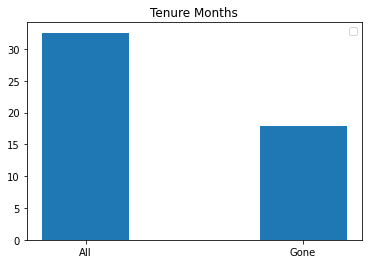

In [ ]:
    plt.title('Tenure Months')
    plt.bar(['All', 'Gone'], [prime['Tenure Months'].mean(), prime[prime['Churn Value'] == 1]['Tenure Months'].mean()], width = 0.4)#), label = ['111', '000']   )#, orientation = 'horizontal' )#, bins=20)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


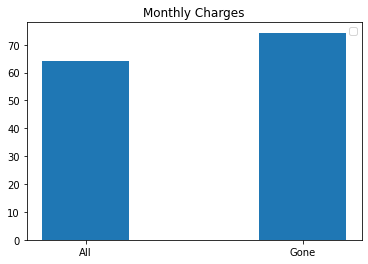

In [ ]:
    plt.title('Monthly Charges')
    plt.bar(['All', 'Gone'], [prime['Monthly Charges'].mean(), prime[prime['Churn Value'] == 1]['Monthly Charges'].mean()], width = 0.4)#), label = ['111', '000']   )#, orientation = 'horizontal' )#, bins=20)
    plt.legend()
    plt.show()

In [ ]:
for p in params:
    print(prime[p].value_counts(), '\n', prime[prime['Churn Value'] == 1][p].value_counts(), '\n')

Male      2692
Female    2590
Name: Gender, dtype: int64 
 Male      688
Female    682
Name: Gender, dtype: int64 

No     4427
Yes     855
Name: Senior Citizen, dtype: int64 
 No     1021
Yes     349
Name: Senior Citizen, dtype: int64 

No     2701
Yes    2581
Name: Partner, dtype: int64 
 No     876
Yes    494
Name: Partner, dtype: int64 

No     4054
Yes    1228
Name: Dependents, dtype: int64 
 No     1291
Yes      79
Name: Dependents, dtype: int64 

Yes    4763
No      519
Name: Phone Service, dtype: int64 
 Yes    1251
No      119
Name: Phone Service, dtype: int64 

Fiber optic    2288
DSL            1809
No             1185
Name: Internet Service, dtype: int64 
 Fiber optic    941
DSL            341
No              88
Name: Internet Service, dtype: int64 

Month-to-month    2864
Two year          1300
One year          1118
Name: Contract, dtype: int64 
 Month-to-month    1211
One year           125
Two year            34
Name: Contract, dtype: int64 

1    1020
4     990
3     9

Из сравнения видим, что скорее уходят клиенты с ежемесячным контрактом, без партнера, проживающий без dependents, пользующиеся интернетом и с ежемесячным договором.

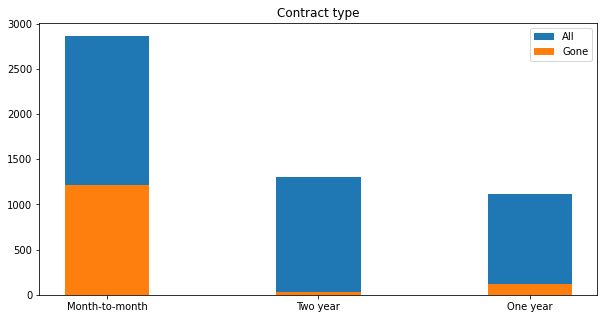

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(prime['Contract'].value_counts().index, prime['Contract'].value_counts().values, width = 0.4, label='All')
rects1 = ax.bar(prime[prime['Churn Value'] == 1]['Contract'].value_counts().index, prime[prime['Churn Value'] == 1]['Contract'].value_counts().values,  width = 0.4, label='Gone')
plt.title('Contract type')
#ax.set_xticks(prime['Partner'].value_counts().index)
ax.legend(loc = 'upper right')

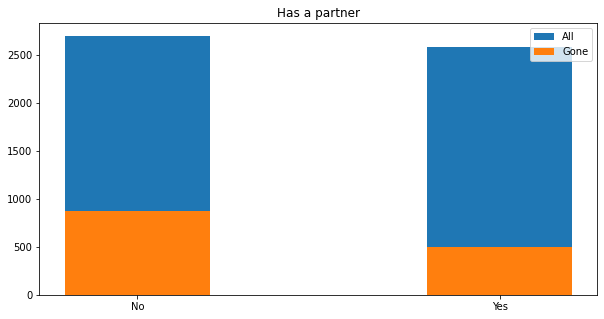

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(prime['Partner'].value_counts().index, prime['Partner'].value_counts().values, width = 0.4, label='All')
rects1 = ax.bar(prime[prime['Churn Value'] == 1]['Partner'].value_counts().index, prime[prime['Churn Value'] == 1]['Partner'].value_counts().values,  width = 0.4, label='Gone')
plt.title('Has a partner')
#ax.set_xticks(prime['Partner'].value_counts().index)
ax.legend(loc = 'upper right')

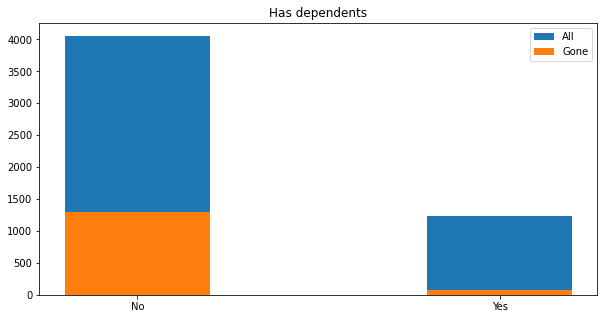

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(prime['Dependents'].value_counts().index, prime['Dependents'].value_counts().values, width = 0.4, label='All')
rects1 = ax.bar(prime[prime['Churn Value'] == 1]['Dependents'].value_counts().index, prime[prime['Churn Value'] == 1]['Dependents'].value_counts().values,  width = 0.4, label='Gone')
plt.title('Has dependents')
#ax.set_xticks(prime['Partner'].value_counts().index)
ax.legend(loc = 'upper right')

In [ ]:
prime[['Churn Reason']].value_counts()

Churn Reason                             
Attitude of support person                   143
Competitor offered higher download speeds    141
Competitor offered more data                 120
Don't know                                   113
Competitor made better offer                 103
Attitude of service provider                 100
Competitor had better devices                 83
Product dissatisfaction                       81
Network reliability                           73
Service dissatisfaction                       71
Price too high                                71
Lack of self-service on Website               63
Moved                                         44
Extra data charges                            40
Lack of affordable download/upload speed      34
Limited range of services                     31
Long distance charges                         29
Poor expertise of phone support               16
Poor expertise of online support              10
Deceased                   

In [ ]:
prime.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Churn Score', 'CLTV', 'Churn Reason', 'Churn Value',
       'Number of Services'],
      dtype='object')

Объединим похожие причины в более общие

In [ ]:
#Клиенты, неудовлетворенные сервисом или обслуживанием
prime.loc[prime['Churn Reason'].isin(['Attitude of support person', 'Attitude of service provider', \
                                  'Service dissatisfaction', 'Limited range of services', 'Poor expertise of phone support', 'Poor expertise of online support' ]), 'Reason'] = 'Service dissatisfaction'

In [ ]:
#ушли к конкуренту
prime.loc[prime['Churn Reason'].isin(['Competitor offered higher download speeds', 'Competitor offered more data',  'Competitor made better offer', 'Competitor had better devices'])
, 'Reason'] = 'Gone to a competitor'

In [ ]:
prime.loc[prime['Churn Value'] == 1, 'Reason'].fillna('Other', inplace = True)

In [ ]:
tt = prime.loc[prime['Churn Value'] == 1, 'Reason'].fillna('Other')

In [ ]:
prime['Reason'] = tt

In [ ]:
prime['Reason'].value_counts()

Other                      552
Gone to a competitor       447
Service dissatisfaction    371
Name: Reason, dtype: int64

No handles with labels found to put in legend.


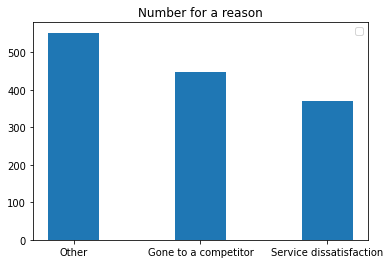

In [ ]:
    plt.bar(prime['Reason'].value_counts().index, prime['Reason'].value_counts(), width = 0.4)#), label = ['111', '000']   )#, orientation = 'horizontal' )#, bins=20)
    plt.title('Number for a reason')
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


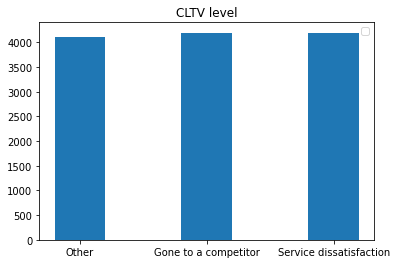

In [ ]:
    plt.bar(prime['Reason'].value_counts().index, [prime[prime['Reason']==r]['CLTV'].mean() for r in prime['Reason'].value_counts().index], width = 0.4)#), label = ['111', '000']   )#, orientation = 'horizontal' )#, bins=20)
    plt.title('CLTV level')
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


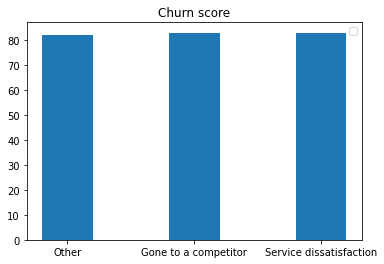

In [ ]:
    plt.bar(prime['Reason'].value_counts().index, [prime[prime['Reason']==r]['Churn Score'].mean() for r in prime['Reason'].value_counts().index], width = 0.4)#), label = ['111', '000']   )#, orientation = 'horizontal' )#, bins=20)
    plt.title('Churn score')
    plt.legend()
    plt.show()

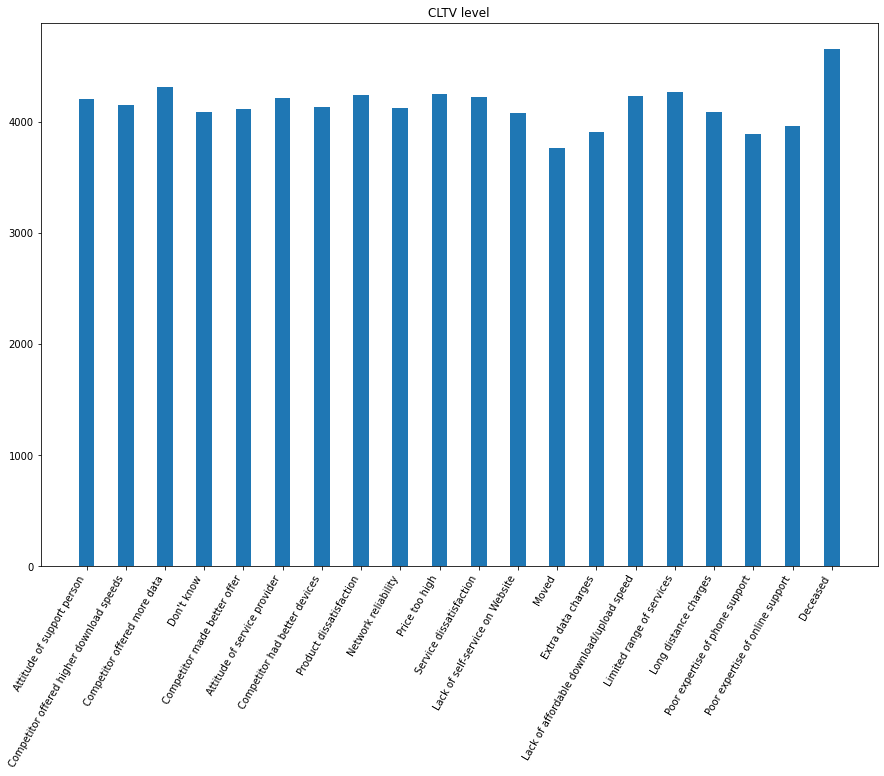

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(prime['Churn Reason'].value_counts().index, [prime[prime['Churn Reason']==r]['CLTV'].mean() for r in prime['Churn Reason'].value_counts().index], width = 0.4)#), label = ['111', '000']   )#, orientation = 'horizontal' )#, bins=20)
plt.title('CLTV level')
plt.gca().set_xticklabels(prime['Churn Reason'].value_counts().index, rotation=60, horizontalalignment= 'right')
#plt.legend()
plt.show()

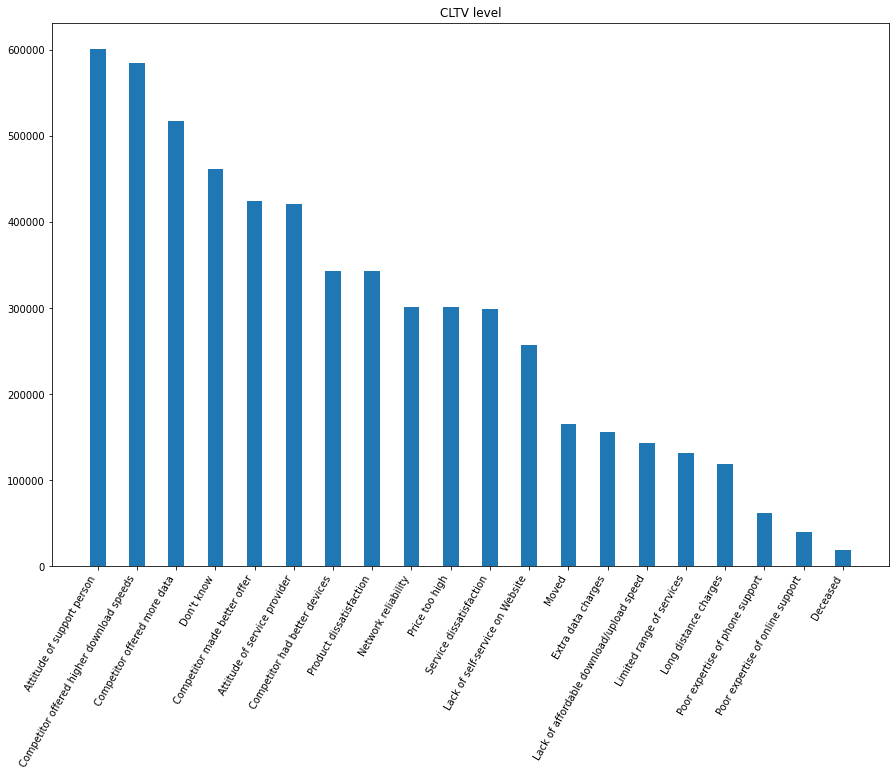

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(prime['Churn Reason'].value_counts().index, [prime[prime['Churn Reason']==r]['CLTV'].sum() for r in prime['Churn Reason'].value_counts().index], width = 0.4)#), label = ['111', '000']   )#, orientation = 'horizontal' )#, bins=20)
plt.title('CLTV level')
plt.gca().set_xticklabels(prime['Churn Reason'].value_counts().index, rotation=60, horizontalalignment= 'right')
#plt.legend()
plt.show()

In [ ]:
prime['Churn Reason'].value_counts()

Attitude of support person                   143
Competitor offered higher download speeds    141
Competitor offered more data                 120
Don't know                                   113
Competitor made better offer                 103
Attitude of service provider                 100
Competitor had better devices                 83
Product dissatisfaction                       81
Network reliability                           73
Price too high                                71
Service dissatisfaction                       71
Lack of self-service on Website               63
Moved                                         44
Extra data charges                            40
Lack of affordable download/upload speed      34
Limited range of services                     31
Long distance charges                         29
Poor expertise of phone support               16
Poor expertise of online support              10
Deceased                                       4
Name: Churn Reason, 

In [ ]:
prime

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Score,CLTV,Churn Reason,Churn Value,Number of Services,Reason
0,2995-YWTCD,1,United States,California,Browns Valley,95918,"39.292334, -121.320597",39.292334,-121.320597,Female,No,Yes,Yes,19,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.90,79,5396,NaN,0,2,NaN
1,3318-ISQFQ,1,United States,California,Newark,94560,"37.504133, -122.032347",37.504133,-122.032347,Female,No,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.50,28,5409,NaN,0,1,NaN
2,2469-DTSGX,1,United States,California,Somis,93066,"34.297628, -119.014627",34.297628,-119.014627,Female,Yes,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,111.65,75,5388,NaN,0,6,NaN
3,8896-BQTTI,1,United States,California,Cool,95614,"38.880622, -120.973865",38.880622,-120.973865,Male,No,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,53,2371,NaN,0,2,NaN
4,9565-DJPIB,1,United States,California,Vallejo,94590,"38.104705, -122.247387",38.104705,-122.247387,Female,No,No,No,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Mailed check,89.60,87,4689,Network reliability,1,4,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,8216-AZUUZ,1,United States,California,San Francisco,94118,"37.781304, -122.461522",37.781304,-122.461522,Female,No,Yes,Yes,42,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,100.40,76,3265,NaN,0,4,NaN
5278,5006-MXVRN,1,United States,California,Keyes,95328,"37.555631, -120.911653",37.555631,-120.911653,Female,No,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.70,45,3733,NaN,0,1,NaN
5279,4804-NCPET,1,United States,California,Clearlake,95422,"38.965804, -122.631779",38.965804,-122.631779,Male,No,Yes,Yes,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,60,4821,NaN,0,1,NaN
5280,2878-DHMIN,1,United States,California,Sacramento,95833,"38.619049, -121.517552",38.619049,-121.517552,Male,No,Yes,Yes,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.90,30,2334,NaN,0,1,NaN


In [ ]:
for p in params:
    print(prime[prime['Churn Value'] == 1][p].value_counts(), '\n', prime[prime['Reason'] == 'Service dissatisfaction'][p].value_counts(), '\n')

Male      688
Female    682
Name: Gender, dtype: int64 
 Female    192
Male      179
Name: Gender, dtype: int64 

No     1021
Yes     349
Name: Senior Citizen, dtype: int64 
 No     283
Yes     88
Name: Senior Citizen, dtype: int64 

No     876
Yes    494
Name: Partner, dtype: int64 
 No     241
Yes    130
Name: Partner, dtype: int64 

No     1291
Yes      79
Name: Dependents, dtype: int64 
 No     345
Yes     26
Name: Dependents, dtype: int64 

Yes    1251
No      119
Name: Phone Service, dtype: int64 
 Yes    332
No      39
Name: Phone Service, dtype: int64 

Fiber optic    941
DSL            341
No              88
Name: Internet Service, dtype: int64 
 Fiber optic    257
DSL             87
No              27
Name: Internet Service, dtype: int64 

Month-to-month    1211
One year           125
Two year            34
Name: Contract, dtype: int64 
 Month-to-month    332
One year           35
Two year            4
Name: Contract, dtype: int64 

3    392
2    311
4    295
5    178
1    12

Женщины уходят немного чаще по этим причинам, нежели мужчины

In [ ]:
prime[prime['Churn Value'] == 1].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value,Number of Services
count,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000
mean,1.0,93519.519708,36.272906,-119.797606,17.918978,74.313139,82.641606,4156.951825,1.0,3.221898
std,0.0,1875.989918,2.480098,2.147682,19.464564,24.765049,10.259846,1187.169903,0.0,1.337918
min,1.0,90001.000000,32.578103,-124.301372,1.000000,18.850000,65.000000,2003.000000,1.0,1.000000
25%,1.0,92082.250000,34.038983,-121.826534,2.000000,55.437500,74.000000,3123.000000,1.0,2.000000
50%,1.0,93554.500000,36.302741,-119.700284,10.000000,79.575000,83.000000,4231.500000,1.0,3.000000
75%,1.0,95358.000000,38.231113,-118.016195,29.000000,94.250000,91.000000,5178.750000,1.0,4.000000
max,1.0,96161.000000,41.962127,-114.716120,72.000000,118.350000,100.000000,6484.000000,1.0,7.000000


In [ ]:
prime[prime['Reason'] == 'Service dissatisfaction'].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value,Number of Services
count,371.0,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.0,371.000000
mean,1.0,93174.938005,35.686253,-119.319806,16.951482,73.440970,83.123989,4194.654987,1.0,3.161725
std,0.0,1723.079451,2.267748,1.953567,18.885940,25.609441,10.324505,1178.318520,0.0,1.371817
min,1.0,90001.000000,32.579134,-124.301372,1.000000,18.850000,65.000000,2003.000000,1.0,1.000000
25%,1.0,91933.000000,33.925413,-120.928193,1.000000,55.150000,74.000000,3213.500000,1.0,2.000000
50%,1.0,93108.000000,34.601055,-118.831181,10.000000,79.150000,83.000000,4254.000000,1.0,3.000000
75%,1.0,94601.000000,37.539171,-117.878731,27.000000,94.175000,92.000000,5217.500000,1.0,4.000000
max,1.0,96161.000000,41.759864,-114.716120,72.000000,113.200000,100.000000,6484.000000,1.0,7.000000


У клиентов из этой категории длительность пользования меньше, чем в среднем у ушедших клиентов,а также немного меньше количество услуг.

In [ ]:
prime[['Churn Reason']].value_counts()

Churn Reason                             
Attitude of support person                   143
Competitor offered higher download speeds    141
Competitor offered more data                 120
Don't know                                   113
Competitor made better offer                 103
Attitude of service provider                 100
Competitor had better devices                 83
Product dissatisfaction                       81
Network reliability                           73
Service dissatisfaction                       71
Price too high                                71
Lack of self-service on Website               63
Moved                                         44
Extra data charges                            40
Lack of affordable download/upload speed      34
Limited range of services                     31
Long distance charges                         29
Poor expertise of phone support               16
Poor expertise of online support              10
Deceased                   

In [ ]:
prime.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Churn Score', 'CLTV', 'Churn Reason', 'Churn Value',
       'Number of Services', 'Reason'],
      dtype='object')

In [ ]:
com = ['City', 'Streaming TV', 'Streaming Movies','Phone Service', 'Internet Service']

In [ ]:
for p in com:
    print(prime[prime['Churn Value'] == 1][p].value_counts(), '\n', prime[prime['Reason'] == 'Gone to a competitor'][p].value_counts(), '\n')

Los Angeles      71
San Diego        35
San Francisco    23
San Jose         23
Sacramento       22
                 ..
Bellflower        1
Annapolis         1
Stevinson         1
Delhi             1
Anderson          1
Name: City, Length: 701, dtype: int64 
 Los Angeles      32
Sacramento       16
San Jose          9
San Francisco     9
San Diego         5
                 ..
Montague          1
Lake Forest       1
Shasta Lake       1
Delano            1
Lodi              1
Name: City, Length: 308, dtype: int64 

No                     692
Yes                    590
No internet service     88
Name: Streaming TV, dtype: int64 
 No                     215
Yes                    204
No internet service     28
Name: Streaming TV, dtype: int64 

No                     683
Yes                    599
No internet service     88
Name: Streaming Movies, dtype: int64 
 No                     212
Yes                    207
No internet service     28
Name: Streaming Movies, dtype: int64 

Yes    1

In [ ]:
cit = prime[prime['Churn Value'] == 1]['City'].value_counts().reset_index()

In [ ]:
cit = cit.merge(prime[prime['Reason'] == 'Gone to a competitor']["City"].value_counts().reset_index(), on='index', how='inner')

In [ ]:
cit['ratio'] = cit['City_y']/cit['City_x']


In [ ]:
cit[cit['City_y'] >= 5]

,index,City_x,City_y,ratio
0,Los Angeles,71,32,0.450704
1,San Diego,35,5,0.142857
2,San Francisco,23,9,0.391304
3,San Jose,23,9,0.391304
4,Sacramento,22,16,0.727273
11,Stockton,8,5,0.625000
18,Palmdale,5,5,1.000000


Можно найти города в которых есть тенденция ухода клиентов к конкурентам(напр. Sacramento)

In [ ]:
prime[prime['Churn Value'] == 1].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value,Number of Services
count,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000
mean,1.0,93519.519708,36.272906,-119.797606,17.918978,74.313139,82.641606,4156.951825,1.0,3.221898
std,0.0,1875.989918,2.480098,2.147682,19.464564,24.765049,10.259846,1187.169903,0.0,1.337918
min,1.0,90001.000000,32.578103,-124.301372,1.000000,18.850000,65.000000,2003.000000,1.0,1.000000
25%,1.0,92082.250000,34.038983,-121.826534,2.000000,55.437500,74.000000,3123.000000,1.0,2.000000
50%,1.0,93554.500000,36.302741,-119.700284,10.000000,79.575000,83.000000,4231.500000,1.0,3.000000
75%,1.0,95358.000000,38.231113,-118.016195,29.000000,94.250000,91.000000,5178.750000,1.0,4.000000
max,1.0,96161.000000,41.962127,-114.716120,72.000000,118.350000,100.000000,6484.000000,1.0,7.000000


In [ ]:
prime[prime['Reason'] == 'Gone to a competitor'].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value,Number of Services
count,447.0,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.0,447.000000
mean,1.0,93839.024609,36.658471,-120.080118,18.565996,75.186130,82.856823,4184.302013,1.0,3.272931
std,0.0,1830.718458,2.522955,2.238831,19.953410,24.811373,10.130188,1227.188179,0.0,1.328122
min,1.0,90002.000000,32.605012,-124.217378,1.000000,19.000000,65.000000,2007.000000,1.0,1.000000
25%,1.0,92357.000000,34.124932,-121.997850,3.000000,55.800000,74.500000,3089.500000,1.0,2.000000
50%,1.0,94108.000000,37.218705,-120.765493,10.000000,80.250000,83.000000,4254.000000,1.0,3.000000
75%,1.0,95525.500000,38.480984,-118.126190,29.000000,94.800000,91.000000,5297.000000,1.0,4.000000
max,1.0,96122.000000,41.962127,-114.717964,72.000000,118.350000,100.000000,6350.000000,1.0,7.000000


Посмотрим, на что опирается показатель CLTV

In [ ]:
prime[prime['CLTV'] >= 6000].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value,Number of Services
count,325.0,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,1.0,93551.209231,36.425293,-119.939593,63.249231,72.977231,53.412308,6253.218462,0.092308,4.313846
std,0.0,1914.246785,2.498886,2.156629,7.472338,31.540859,18.774387,146.205836,0.289906,1.883970
min,1.0,90014.000000,32.605012,-124.217378,49.000000,19.150000,8.000000,6002.000000,0.000000,1.000000
25%,1.0,92059.000000,34.035849,-121.912061,57.000000,47.850000,38.000000,6123.000000,0.000000,3.000000
50%,1.0,93624.000000,36.488056,-120.129921,65.000000,81.200000,54.000000,6255.000000,0.000000,5.000000
75%,1.0,95441.000000,38.434138,-118.111335,71.000000,99.350000,69.000000,6380.000000,0.000000,6.000000
max,1.0,96146.000000,41.932207,-114.365140,72.000000,118.350000,98.000000,6499.000000,1.000000,7.000000


In [ ]:
prime.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn Value,Number of Services
count,5282.0,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,1.0,93519.303484,36.289014,-119.808827,32.565884,64.281929,58.322794,4415.362173,0.259371,3.359523
std,0.0,1867.230602,2.459121,2.156348,24.606356,30.258852,21.601969,1184.458870,0.438331,1.745840
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,5.000000,2003.000000,0.000000,1.000000
25%,1.0,92086.000000,34.029175,-121.823565,9.000000,34.200000,40.000000,3483.250000,0.000000,2.000000
50%,1.0,93554.500000,36.414413,-119.739935,29.000000,70.150000,60.000000,4545.500000,0.000000,3.000000
75%,1.0,95356.000000,38.226681,-118.043237,56.000000,89.850000,75.000000,5395.750000,1.000000,5.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.600000,100.000000,6499.000000,1.000000,7.000000


In [ ]:
for p in params:
    print(prime[p].value_counts(), '\n', prime[prime['CLTV'] >= 6000][p].value_counts(), '\n')

Male      2692
Female    2590
Name: Gender, dtype: int64 
 Male      186
Female    139
Name: Gender, dtype: int64 

No     4427
Yes     855
Name: Senior Citizen, dtype: int64 
 No     279
Yes     46
Name: Senior Citizen, dtype: int64 

No     2701
Yes    2581
Name: Partner, dtype: int64 
 Yes    240
No      85
Name: Partner, dtype: int64 

No     4054
Yes    1228
Name: Dependents, dtype: int64 
 No     217
Yes    108
Name: Dependents, dtype: int64 

Yes    4763
No      519
Name: Phone Service, dtype: int64 
 Yes    295
No      30
Name: Phone Service, dtype: int64 

Fiber optic    2288
DSL            1809
No             1185
Name: Internet Service, dtype: int64 
 Fiber optic    145
DSL            115
No              65
Name: Internet Service, dtype: int64 

Month-to-month    2864
Two year          1300
One year          1118
Name: Contract, dtype: int64 
 Two year          194
One year           81
Month-to-month     50
Name: Contract, dtype: int64 

1    1020
4     990
3     921
2     

Видим, что показатель исходит из ежемесячной стоимости оплаты и проведенных месяцев.

К тому же, стали преобладать двухгодичные договоры(скорее всего, как следствие)

### Построение моделей

#### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
dummy_features = pd.get_dummies(prime[cat_cols])
X = pd.concat([prime[num_cols], dummy_features], axis=1)
y = prime['Churn Value']

X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values, 
                                                train_size=0.8,
                                                random_state=40)

scaler = StandardScaler()
scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

clf3 = LogisticRegressionCV( cv=5, penalty='elasticnet', solver='saga', l1_ratios=np.linspace(0,1,3), scoring='roc_auc', refit=True, random_state=40).fit(X_train, y_train)
print(clf3.score(X_valid, y_valid))

dummy_features_t = pd.get_dummies(test[cat_cols])
missed = dummy_features.columns[~dummy_features.columns.isin(dummy_features_t.columns)]
for m in missed:
    dummy_features_t[m] = 0

amb = dummy_features_t.columns[~dummy_features_t.columns.isin(dummy_features.columns)]
dummy_features_t.drop(amb, axis = 1, inplace = True)
X_t = pd.concat([test[num_cols], dummy_features_t], axis=1)
X_test = scaler.fit_transform(X_t)
pred_reg =  clf3.predict_proba(X_test)[:, 1]

In [ ]:
subm = pd.DataFrame(data = pred_reg, columns = ['Predicted'])

In [ ]:
subm

,Predicted
0,0.500196
1,0.500512
2,0.499304
3,0.500379
4,0.498674
...,...
1756,0.500176
1757,0.499307
1758,0.499153
1759,0.500246


In [ ]:
subm.to_csv('./my_submission.csv')

#### Решающие деревья

In [ ]:
!pip install catboost
import catboost

     |████████████████████████████████| 76.3 MB 81 kB/s 


In [114]:
y = prime['Churn Value']

In [116]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(prime[num_cols+cat_cols], y.values, 
                                                       train_size=0.8, 
                                                       random_state=40)

In [ ]:
boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 5),
                            'max_depth': np.arange(1,7),
                            'learning_rate':np.linspace(0.0001,0.01,7),
                            'n_estimators':np.linspace(30,300,7)}, 
                           X_train_origin, 
                           y_train, plot=True) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
bestIteration = 209

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
639:	loss: 0.8368352	best: 0.8444483 (608)	total: 5m 36s	remaining: 7m 15s

bestTest = 0.8398351823
bestIteration = 209

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
640:	loss: 0.8398352	best: 0.8444483 (608)	total: 5m 37s	remaining: 7m 16s

bestTest = 0.8421715566
bestIteration = 208

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
641:	loss: 0.8421716	best: 0.8444483 (608)	total: 5m 38s	remaining: 7m 16s

bestTest = 0.8431490194
bestIteration = 206

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
642:	loss: 0

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
boost_model = catboost.CatBoostClassifier(depth= 6,
                                            iterations= 300.0,
                                            l2_leaf_reg=0.75,
                                            learning_rate= 0.01,
                                             silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')


In [ ]:
boost_model.fit(X_train_origin, y_train)

In [ ]:
y_train_predicted0 = boost_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted0 = boost_model.predict_proba(X_test_origin)[:, 1]

train_auc0 = roc_auc_score(y_train, y_train_predicted0)
test_auc0 = roc_auc_score(y_test, y_test_predicted0)
print(train_auc0, test_auc0)

0.873427719917168 0.8614644861870346


array([0.17165305, 0.46059519, 0.05923298, ..., 0.04399236, 0.43214731,
       0.05178515])

In [ ]:
df2 = pd.DataFrame(boost_model.predict_proba(test[num_cols+cat_cols])[:, 1])

In [ ]:
df2.to_csv('./my_sub2.csv', header = 'Predicted',index_label='Id')

In [ ]:
boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 6),
                            'max_depth': np.arange(3,7),
                            'learning_rate':np.linspace(0.0003,0.1,7),
                            'n_estimators':np.linspace(200,500,7)}, 
                           X_train_origin, 
                           y_train, plot=True) 

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
bestIteration = 168

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
345:	loss: 0.8507820	best: 0.8559951 (312)	total: 12m 47s	remaining: 30m 41s

bestTest = 0.8543103722
bestIteration = 213

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
346:	loss: 0.8543104	best: 0.8559951 (312)	total: 12m 50s	remaining: 30m 39s

bestTest = 0.8523554468
bestIteration = 148

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
347:	loss: 0.8523554	best: 0.8559951 (312)	total: 12m 52s	remaining: 30m 37s

bestTest = 0.8514574526
bestIteration = 225

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
348:	l

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
boost_model2 = catboost.CatBoostClassifier(depth= 4,
                                            iterations= 200.0,
                                            l2_leaf_reg=0.4,
                                            learning_rate= 0.066,
                                             silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')


In [118]:
boost_model2.fit(X_train_origin, y_train)
y_train_predicted1 = boost_model2.predict_proba(X_train_origin)[:, 1]
y_test_predicted1 = boost_model2.predict_proba(X_test_origin)[:, 1]

train_auc1 = roc_auc_score(y_train, y_train_predicted1)
test_auc1 = roc_auc_score(y_test, y_test_predicted1)
print(train_auc1, test_auc1)

0.8736152691103991 0.8648879186997837


In [119]:
df3 = pd.DataFrame(boost_model2.predict_proba(test[num_cols+cat_cols])[:, 1])

In [ ]:
df3.to_csv('./my_sub4.csv', header = ['Predicted'],index_label='Id')

XGB

In [120]:
from xgboost import XGBClassifier

In [167]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier()

In [168]:
print(roc_auc_score(y_valid,model.predict_proba(X_valid)[:,1]))

0.8207043144880214


In [169]:
df_xgb = pd.DataFrame(model.predict_proba(X_test)[:,1])

GBM

In [163]:
import lightgbm as lgb

In [164]:
lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

lgbm_params = {
    'objective': 'binary',
    'metric': 'auc'
}
evaluation_results={}
model2 = lgb.train(lgbm_params, lgb_train,  valid_sets=[lgb_train, lgb_eval], 
                 valid_names=['Train', 'Test'],
                 evals_result=evaluation_results,num_boost_round=20)

y_pred = model2.predict(X_valid)

[1]	Train's auc: 0.869502	Test's auc: 0.795536
[2]	Train's auc: 0.875029	Test's auc: 0.801544
[3]	Train's auc: 0.88453	Test's auc: 0.811303
[4]	Train's auc: 0.88893	Test's auc: 0.818306
[5]	Train's auc: 0.892396	Test's auc: 0.821298
[6]	Train's auc: 0.895303	Test's auc: 0.821486
[7]	Train's auc: 0.897429	Test's auc: 0.820931
[8]	Train's auc: 0.899674	Test's auc: 0.82208
[9]	Train's auc: 0.901216	Test's auc: 0.819542
[10]	Train's auc: 0.902728	Test's auc: 0.818611
[11]	Train's auc: 0.904196	Test's auc: 0.816985
[12]	Train's auc: 0.905432	Test's auc: 0.813481
[13]	Train's auc: 0.907091	Test's auc: 0.813172
[14]	Train's auc: 0.908613	Test's auc: 0.812729
[15]	Train's auc: 0.90994	Test's auc: 0.812917
[16]	Train's auc: 0.910909	Test's auc: 0.812546
[17]	Train's auc: 0.912301	Test's auc: 0.813548
[18]	Train's auc: 0.914176	Test's auc: 0.811665
[19]	Train's auc: 0.915907	Test's auc: 0.808263
[20]	Train's auc: 0.917267	Test's auc: 0.809893


In [166]:
y_pred2 = model2.predict(X_test)

In [138]:
df_lgb = pd.DataFrame(y_pred)

#### Черновой( стек)

In [160]:
df3.rename({0: 'cat'}, axis=1, inplace=True)
df_xgb.rename({0: 'xgb'}, axis=1, inplace=True)
df_lgb.rename({0: 'lgb'}, axis=1, inplace=True)

In [161]:
df_all = pd.concat([df_xgb,df_lgb,df3],sort=False, axis=1)


In [199]:
df_all.fillna(0, inplace = True)

In [184]:
df_all_tr = pd.DataFrame({'xgb': model.predict_proba(X_train)[:,1], 'lgb': model2.predict(X_train), 'cat': y_train_predicted1, 'y': y_train})

In [189]:
clf4 = LogisticRegressionCV( cv=5, penalty='elasticnet', solver='saga', l1_ratios=np.linspace(0,1,3), scoring='roc_auc', refit=True, random_state=40).fit(df_all_tr.drop('y', axis =1), df_all_tr['y'])

In [201]:
 pred_all_reg = clf4.predict_proba(df_all)[:, 1]

###(Черновик)Без учета городов

Попробуем выкинуть признак города, т.к. у нас есть широта и долгота и различных городов достаточно много

Логистическая регрессия

In [ ]:
prime['City'].value_counts()

Los Angeles      235
San Diego        117
San Jose          86
San Francisco     85
Sacramento        84
                ... 
San Carlos         1
Rohnert Park       1
Johannesburg       1
Lewiston           1
Rio Dell           1
Name: City, Length: 1125, dtype: int64

In [ ]:
cat_cols2 = cat_cols.copy()

In [ ]:
cat_cols2.remove("City")
cat_cols2

['Country',
 'State',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [ ]:
dummy_features2 = pd.get_dummies(prime[cat_cols2])
X = pd.concat([prime[num_cols], dummy_features2], axis=1)
y = prime['Churn Value']

In [ ]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=40)

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_train2)
X_valid2 = scaler.transform(X_valid2)

In [ ]:
clf4 = LogisticRegressionCV( cv=5, penalty='elasticnet', solver='saga', l1_ratios=np.linspace(0,1,3), scoring='roc_auc', refit=True, random_state=40).fit(X_train2, y_train2)

In [ ]:
clf4.score(X_valid2, y_valid2)

0.808484976336354

In [ ]:
dummy_features2t = pd.get_dummies(test[cat_cols2])
X_test2 = pd.concat([test[num_cols], dummy_features2t], axis=1)
X_test2 = scaler.fit_transform(X_test2)

In [ ]:
pred_r2 = clf4.predict_proba(X_test2)[:, 1]

In [ ]:
df_pr2 = pd.DataFrame(pred_r2)

In [ ]:
df_pr2.to_csv('./my_sub5.csv', header = ['Predicted'],index_label='Id')

Градиентный бустинг

XGB

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(X_train2,y_train2)

XGBClassifier()

In [ ]:
print(roc_auc_score(y_valid2,model.predict_proba(X_valid2)[:,1]))

0.8606642330410537


In [ ]:
df_xgb = pd.DataFrame(model.predict_proba(X_test2)[:,1])

In [ ]:
df_xgb.to_csv('./my_sub6.csv', header = ['Predicted'],index_label='Id')

In [ ]:
!pip install eli5
from eli5 import show_weights


     |████████████████████████████████| 106 kB 5.4 MB/s 


In [ ]:
show_weights(model)

Weight,Feature
0.2800,f42
0.1710,f22
0.0854,f24
0.0814,f33
0.0489,f44
0.0380,f14
0.0330,f49
0.0247,f3
0.0231,f43
0.0229,f41


GBM

In [ ]:
import lightgbm as lgb

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(prime[num_cols+cat_cols2], y.values, 
                                                       train_size=0.8, 
                                                       random_state=30)

In [ ]:
lgb_train = lgb.Dataset(X_train2,y_train2)
lgb_eval = lgb.Dataset(X_valid2, y_valid2, reference=lgb_train)

lgbm_params = {
    'objective': 'binary',
    'metric': 'auc'
}
evaluation_results={}
model = lgb.train(lgbm_params, lgb_train,  valid_sets=[lgb_train, lgb_eval], 
                 valid_names=['Train', 'Test'],
                 evals_result=evaluation_results,num_boost_round=20)

y_pred = model.predict(X_valid2)

[1]	Train's auc: 0.869502	Test's auc: 0.832479
[2]	Train's auc: 0.875029	Test's auc: 0.838569
[3]	Train's auc: 0.88453	Test's auc: 0.846276
[4]	Train's auc: 0.88893	Test's auc: 0.851864
[5]	Train's auc: 0.892396	Test's auc: 0.855333
[6]	Train's auc: 0.895303	Test's auc: 0.856979
[7]	Train's auc: 0.897429	Test's auc: 0.856619
[8]	Train's auc: 0.899674	Test's auc: 0.857264
[9]	Train's auc: 0.901216	Test's auc: 0.856587
[10]	Train's auc: 0.902728	Test's auc: 0.854799
[11]	Train's auc: 0.904196	Test's auc: 0.85539
[12]	Train's auc: 0.905432	Test's auc: 0.854184
[13]	Train's auc: 0.907091	Test's auc: 0.854297
[14]	Train's auc: 0.908613	Test's auc: 0.853721
[15]	Train's auc: 0.90994	Test's auc: 0.854104
[16]	Train's auc: 0.910909	Test's auc: 0.854975
[17]	Train's auc: 0.912301	Test's auc: 0.855315
[18]	Train's auc: 0.914176	Test's auc: 0.855017
[19]	Train's auc: 0.915907	Test's auc: 0.855824
[20]	Train's auc: 0.917267	Test's auc: 0.855874


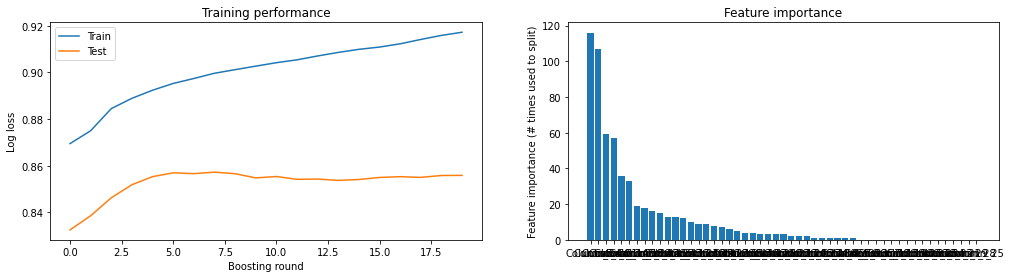

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=[17, 4])

# Plot the log loss during training
axs[0].plot(evaluation_results['Train']['auc'], label='Train')
axs[0].plot(evaluation_results['Test']['auc'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': model.feature_name(), 
                            'importance': model.feature_importance()}).sort_values('importance', ascending=False)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')

plt.show()

In [ ]:
y_pred2 = model.predict(X_test2)

In [ ]:
df_lgb = pd.DataFrame(y_pred2)

In [ ]:
df_lgb.to_csv('./my_sub7.csv', header = ['Predicted'],index_label='Id')

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
param_grid = {'n_estimators':np.arange(40,300,40),'max_depth':np.arange(3,8), 'learning_rate': np.linspace(0.001, 0.1, 5),
              'reg_alpha': np.linspace(0,1,3),  'reg_lambda': np.linspace(0,1,3)} 
grs = GridSearchCV(model, param_grid=param_grid, cv = 10, n_jobs=4, return_train_score = False)
grs.fit(X_train2,y_train2)

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=4,
             param_grid={'learning_rate': array([0.001  , 0.02575, 0.0505 , 0.07525, 0.1    ]),
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'n_estimators': array([ 40,  80, 120, 160, 200, 240, 280]),
                         'reg_alpha': array([0. , 0.5, 1. ]),
                         'reg_lambda': array([0. , 0.5, 1. ])})

In [ ]:
y_pred3 = grs.predict(X_valid2)

In [ ]:
print(roc_auc_score(y_valid2, y_pred3))

0.7137019848112411


In [ ]:
y_pred3 = grs.predict(X_test2)
df_gbm = pd.DataFrame(y_pred3)
df_gbm.to_csv('./my_sub8.csv', header = ['Predicted'],index_label='Id')

Catboost

In [ ]:
X_train_cat, X_test_origin_cat, y_train_cat, y_test_cat = train_test_split(prime[num_cols+cat_cols2], y.values, 
                                                       train_size=0.8, 
                                                       random_state=5)

In [ ]:
boosting_model_cat = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols2,
                                             eval_metric='AUC')
boosting_model_cat.grid_search({'l2_leaf_reg': np.linspace(0, 1, 4),
                            'max_depth': np.arange(3,8),
                            'learning_rate':np.linspace(0.001,0.1,4),
                            'n_estimators':np.linspace(40,500,7)}, 
                           X_train_cat, 
                           y_train_cat, plot=True) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8320427169
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8320427	best: 0.8320427 (0)	total: 229ms	remaining: 2m 8s

bestTest = 0.8554762628
bestIteration = 39

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8554763	best: 0.8554763 (1)	total: 398ms	remaining: 1m 51s

bestTest = 0.8603458997
bestIteration = 34

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8603459	best: 0.8603459 (2)	total: 564ms	remaining: 1m 44s

bestTest = 0.8647491794
bestIteration = 39

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8647492	best: 0.8647492 (3)	total: 728ms	remaining: 1m 41s

bestT

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
boost_model2 = catboost.CatBoostClassifier(depth= 3,
                                            iterations= 270.0,
                                            l2_leaf_reg=0.0,
                                            learning_rate= 0.1,
                                             silent=True,
                                             cat_features=cat_cols2,
                                             eval_metric='AUC')


In [ ]:
boost_model2.fit(X_train_cat, y_train_cat)
y_train_predicted1 = boost_model2.predict_proba(X_train_cat)[:, 1]
y_test_predicted1 = boost_model2.predict_proba(X_test_origin_cat)[:, 1]

train_auc1 = roc_auc_score(y_train_cat, y_train_predicted1)
test_auc1 = roc_auc_score(y_test_cat, y_test_predicted1)
print(train_auc1, test_auc1)

0.9039049500382104 0.8449268984401741


In [ ]:
df_cat = pd.DataFrame(boost_model2.predict_proba(test[num_cols+cat_cols2])[:, 1])

In [ ]:
df_cat.to_csv('./my_sub9.csv', header = ['Predicted'],index_label='Id')

In [ ]:
df_all = df_cat*0.6 + df_xgb*0.3 + df_gbm*0.1

In [ ]:
df_all.to_csv('./my_sub_all.csv', header = ['Predicted'],index_label='Id')